This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html

In [1]:
%matplotlib inline

In [2]:
import random

import thinkbayes2
import thinkplot

In [3]:
def MakePmfFromCdf(cdf, name=None):
    """Makes a normalized Pmf from a Cdf object.

    Args:
        cdf: Cdf object
        name: string name for the new Pmf

    Returns:
        Pmf object
    """
    if name is None:
        name = cdf.label

    pmf = thinkbayes2.Pmf(label=name)

    prev = 0.0
    for val, prob in cdf.Items():
        pmf.Incr(val, prob)
    return pmf

In [4]:
class Die(thinkbayes2.Pmf):
    """Represents the PMF of outcomes for a die."""

    def __init__(self, sides, name=''):
        """Initializes the die.

        sides: int number of sides
        name: string
        """
        thinkbayes2.Pmf.__init__(self, label=name)
        for x in range(1, sides+1):
            self.Set(x, 1)
        self.Normalize()

In [5]:
def PmfMax(pmf1, pmf2):
    """Computes the distribution of the max of values drawn from two Pmfs.

    pmf1, pmf2: Pmf objects

    returns: new Pmf
    """
    res = thinkbayes2.Pmf()
    for v1, p1 in pmf1.Items():
        for v2, p2 in pmf2.Items():
            res.Incr(max(v1, v2), p1*p2)
    return res

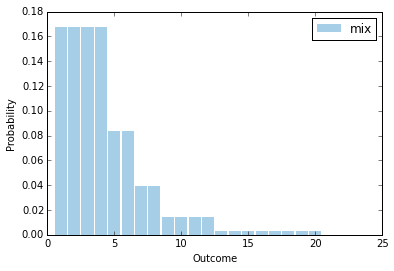

In [6]:
pmf_dice = thinkbayes2.Pmf()
pmf_dice.Set(Die(4), 5)
pmf_dice.Set(Die(6), 4)
pmf_dice.Set(Die(8), 3)
pmf_dice.Set(Die(12), 2)
pmf_dice.Set(Die(20), 1)
pmf_dice.Normalize()

mix = thinkbayes2.Pmf()
for die, weight in pmf_dice.Items():
    for outcome, prob in die.Items():
        mix.Incr(outcome, weight*prob)

mix = thinkbayes2.MakeMixture(pmf_dice)

colors = thinkplot._Brewer.Colors()
thinkplot.Hist(mix, width=0.9, color=colors[4])
thinkplot.Config(xlabel='Outcome',
                 ylabel='Probability')

In [9]:
random.seed(17)

d6 = Die(6, 'd6')

dice = [d6] * 3
three = thinkbayes2.SampleSum(dice, 1000)
three.label = 'sample'
three.Print()

3 0.002
4 0.017
5 0.017
6 0.046
7 0.062
8 0.095
9 0.125
10 0.123
11 0.132
12 0.127
13 0.099
14 0.075
15 0.044
16 0.022
17 0.014


3 0.004629629629629629
4 0.013888888888888888
5 0.027777777777777776
6 0.046296296296296294
7 0.06944444444444445
8 0.09722222222222222
9 0.11574074074074073
10 0.125
11 0.125
12 0.11574074074074074
13 0.09722222222222224
14 0.06944444444444445
15 0.046296296296296294
16 0.027777777777777776
17 0.013888888888888888
18 0.004629629629629629


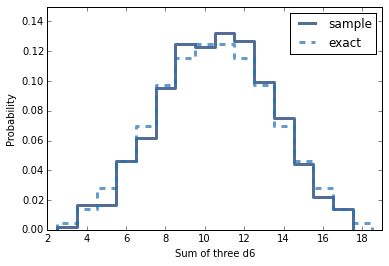

In [10]:
three_exact = d6 + d6 + d6
three_exact.label = 'exact'
three_exact.Print()
thinkplot.PrePlot(num=2)
thinkplot.Pmf(three)
thinkplot.Pmf(three_exact, linestyle='dashed')
thinkplot.Config(xlabel='Sum of three d6',
                 ylabel='Probability',
                 axis=[2, 19, 0, 0.15])

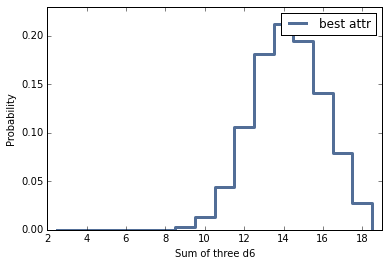

In [14]:
thinkplot.PrePlot(num=1)
    
    # compute the distribution of the best attribute the hard way
best_attr2 = PmfMax(three_exact, three_exact)
best_attr4 = PmfMax(best_attr2, best_attr2)
best_attr6 = PmfMax(best_attr4, best_attr2)
best_attr6.label = 'best attr'
thinkplot.Pmf(best_attr6)
thinkplot.Config(xlabel='Sum of three d6',
                 ylabel='Probability',
                 axis=[2, 19, 0, 0.23])

3 9.84640042005e-15
4 4.03210097201e-11
5 9.80606956393e-09
6 6.20323226463e-07
7 1.74701297953e-05
8 0.000285572333648
9 0.00247724167357
10 0.0128440856934
11 0.0439796447754
12 0.105590541894
13 0.18102225454
14 0.212013521417
15 0.194224527556
16 0.141452169514
17 0.0786340868805
18 0.0274582534226


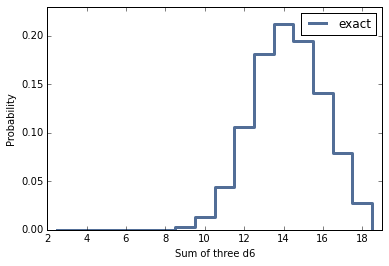

In [13]:
    # and the easy way
best_attr_cdf = three_exact.Max(6)
best_attr_pmf = MakePmfFromCdf(best_attr_cdf)
best_attr_pmf.Print()
thinkplot.Pmf(best_attr_pmf)
thinkplot.Config(xlabel='Sum of three d6',
                 ylabel='Probability',
                 axis=[2, 19, 0, 0.23])